#**PROJECT NAME** : **IMDB Movie Rating Prediction**

The main objective is to build a model that predicts the rating of a movie based on features like genre, director, and actors. We can use regression
techniques to tackle this problem.

## Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/CodSoft/Project 1/IMDb Movies India.csv', encoding='ISO-8859-1')

##Understanding of Data

In [ ]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
print(f'No. of Columns {df.shape[1]}')
print(f'No. of Rows {df.shape[0]}')
df.shape

No. of Columns 10
No. of Rows 15509


(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


##Data Cleaning

In [ ]:
# Checking Null Values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# Locating rows with missing values in columns from 1 to 9
nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
nulls

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking if there are any typos
for col in df.select_dtypes(include = 'object'):   # for col in df:
  print(f'Name of Column: {col}')
  print(df[col].unique())
  print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [ ]:
# Handling the null values
df.dropna(inplace= True)

#Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column and convert it to integer
df['Year'] = df['Year'].str.replace('[()]', '', regex= True).astype(int)

# Convert 'Duration' to numeric and replacing the 'min', while keeping only numerical part
df['Duration'] = pd.to_numeric(df['Duration'].str.replace('min', '', regex= True), errors='coerce')

# Splitting the genre by ',' to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace= True)

# Convert 'Votes' to numeric and replace the ',' to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', '', regex= True), errors= 'coerce')

In [ ]:
# Data info after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11963 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [ ]:
# Checking duplicate values by Name and Year

duplicates = df.groupby(['Name', 'Year']).filter(lambda x: len(x)>1)
duplicates.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
# Dropping the duplicated values by Name

df.drop_duplicates(['Name'], keep= False, inplace= True)

##**Exploratory Data Analysis**

In [ ]:
# Descriptive Analysis
df.describe()

,Year,Duration,Rating,Votes
count,1505.000000,1505.000000,1505.000000,1505.000000
mean,1998.629236,123.502326,5.971163,560.668439
std,20.478860,24.999338,1.418131,4343.960910
min,1931.000000,45.000000,1.600000,5.000000
25%,1986.000000,107.000000,5.000000,15.000000
50%,2005.000000,125.000000,6.100000,35.000000
75%,2016.000000,140.000000,7.000000,131.000000
max,2021.000000,300.000000,9.400000,101014.000000


In [ ]:
# Descriptive Analysis of Object Dtype
df.describe(include= 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1505,1505,1505,1505,1505,1505
unique,1505,20,1105,998,1115,1136
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,765,13,22,12,16


In [ ]:
# Find the row with the highest number of votes
max_vote_row = df[df['Votes'] == df['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_vote_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
number_highest_votes = max_vote_row['Votes'].values[0]

print(f'Name of the movie with highest votes: {movie_highest_votes}')
print('Number of votes for the movie with the highest votes: ', number_highest_votes)
print('\n','='*100, '\n')

# Find the row with the lowest number of votes
min_vote_row = df[df['Votes'] == df['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_vote_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
number_lowest_votes = min_vote_row['Votes'].values[0]

print(f'Name of the movie with the lowest votes: {movie_lowest_votes}')
print('Number of votes for the movie with the lowest votes: ', number_lowest_votes)

Name of the movie with highest votes: My Name Is Khan
Number of votes for the movie with the highest votes:  101014


Name of the movie with the lowest votes: Anmol Sitaare
Number of votes for the movie with the lowest votes:  5


In [ ]:
# Find the row with the highest rating
max_rating_row = df[df['Rating'] == df['Rating'].max()]     # df.loc[df['Rating']==df['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
number_highest_rating = max_rating_row['Rating'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print(f'Movie with the highest rating: {movie_highest_rating}')
print('Rating of the movie: ', number_highest_rating)
print('Number of votes for the movie with the highest rating: ', votes_highest_rating)
print('\n', '='*100, '\n')

# Find the row with the lowest rating
min_rating_row = df[df['Rating'] == df['Rating'].min()]      # df.loc[df['Rating']==df['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
number_lowest_rating = min_rating_row['Rating'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print(f'Movie with the highest rating: {movie_lowest_rating}')
print('Rating of the movie: ', number_lowest_rating)
print('Number of votes for the movie with the highest rating: ', votes_lowest_rating)

Movie with the highest rating: June
Rating of the movie:  9.4
Number of votes for the movie with the highest rating:  18


Movie with the highest rating: Mumbai Can Dance Saalaa
Rating of the movie:  1.6
Number of votes for the movie with the highest rating:  43


In [ ]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_movie_counts = df['Director'].value_counts()

# Find the director with the highest number of movies directed
director_most_movies = director_movie_counts.idxmax()
number_movies_directed = director_movie_counts.max()

print(f'Director with the highest number of movies directed: {director_most_movies}')
print('Number of movies directed by ', director_most_movies, ':', number_movies_directed)
print('\n', '='*100, '\n')

# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_movie_counts = df['Director'].value_counts()

# Find the director with the lowest number of movies directed
director_least_movies = director_movie_counts.idxmin()
number_movies_directed = director_movie_counts.min()

print(f'Director with the lowest number of movies directed: {director_least_movies}')
print('Number of movies directed by ', director_least_movies, ':', number_movies_directed)

Director with the highest number of movies directed: Kanti Shah
Number of movies directed by  Kanti Shah : 13


Director with the lowest number of movies directed: Sachin Gupta
Number of movies directed by  Sachin Gupta : 1


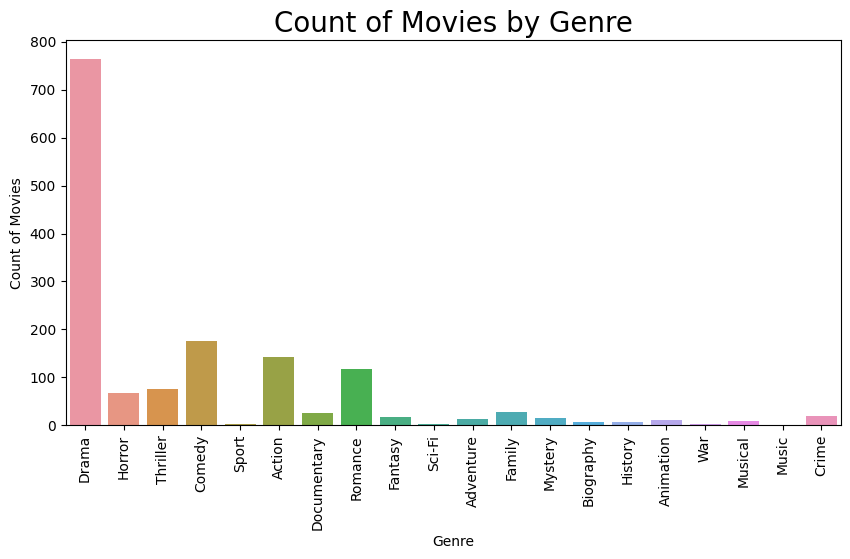

In [ ]:
# Sort the 'Genre' by count in descending order for better visualization
stats_genre = df['Genre'].sort_values(ascending = False)

# Create a bar plot
plt.figure(figsize = (10,5))
sns.countplot(df, x= 'Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Most frequent actor pair

In [ ]:
# Most frequent actor pair
actor_pair = df[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending = False).head(10)
actor_pair

Actor 1        Actor 2                    Actor 3       
Nandita Das    Pravina Bhagwat Deshpande  Ajitesh Gupta     2
Sunil Dutt     Shashi Kapoor              Reena Roy         2
Vidit Kumar    Parminder Ghumman          Sanjeev Tiwari    2
Asrani         Mithun Chakraborty         Pinky Chinoy      2
Aatish Devgan  Sabah                      Rita Bhaduri      1
Aakash         Akashdeep                  Birbal            1
Aamir          Tejas Gadhvi               Aamir Ghani       1
Aamir Bashir   Sandhya Mridul             Koel Purie        1
               Sonal Sehgal               Asrani            1
Aamir Khan     Manisha Koirala            Master Adil       1
dtype: int64

Actors with most films

Mithun Chakraborty    22
Jeetendra             17
Ashok Kumar           15
Dharmendra            15
Shabana Azmi          15
Shashi Kapoor         15
Rajesh Khanna         10
Asrani                 9
Kishore Kumar          9
Sanjeev Kumar          9
Name: Actor 1, dtype: int64


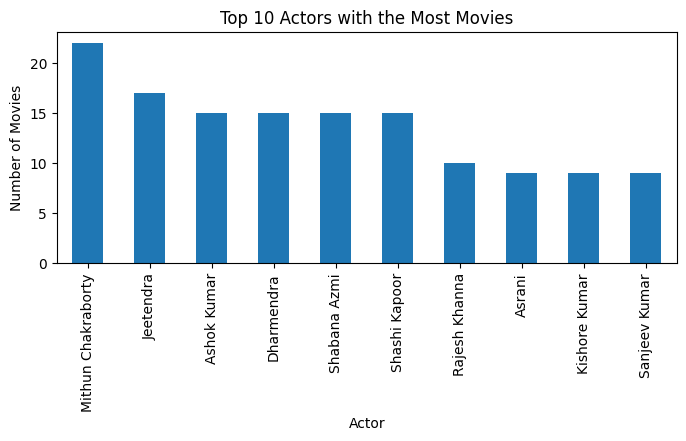

In [ ]:
# Actor 1 with most films
actor1_most_films = df['Actor 1'].value_counts().sort_values(ascending = False).head(10)
print(actor1_most_films)

# Create a bar plot for the top 10 actors with the most movies
plt.figure(figsize=(8, 3))
actor1_most_films.plot(kind= 'bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()

Mithun Chakraborty    12
Hema Malini           11
Dharmendra            10
Rekha                  9
Ashok Kumar            8
Shabana Azmi           8
Smita Patil            7
Shatrughan Sinha       7
Shakti Kapoor          7
Mala Sinha             6
Name: Actor 2, dtype: int64


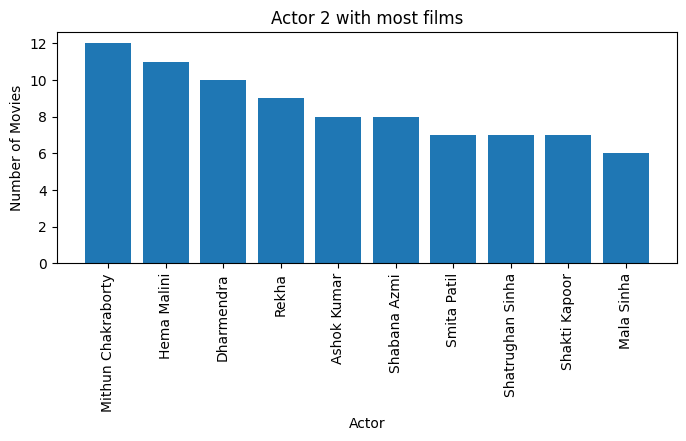

In [ ]:
# Actor 2 with most films
actor2_most_films = df['Actor 2'].value_counts().sort_values(ascending = False).head(10)
print(actor2_most_films)

# Bar plot
plt.figure(figsize=(8, 3))
plt.bar(actor2_most_films.index, actor2_most_films.values)
plt.title('Actor 2 with most films')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()

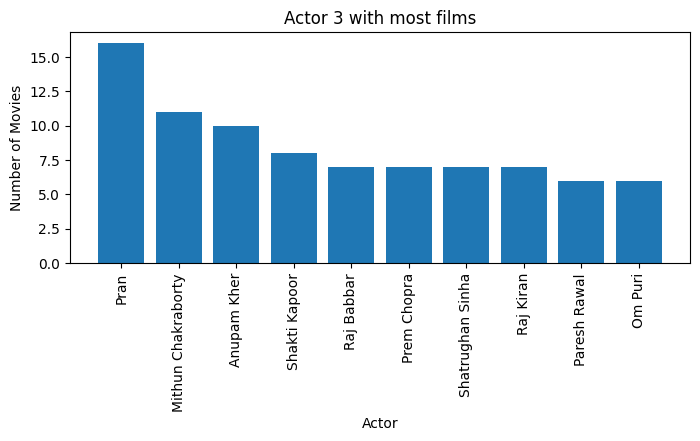

In [ ]:
# Actor 3 with most films
actor3_most_films = df['Actor 3'].value_counts().sort_values(ascending = False).head(10)
actor3_most_films

# Bar plot
plt.figure(figsize=(8, 3))
plt.bar(actor3_most_films.index, actor3_most_films.values)
plt.title('Actor 3 with most films')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()

Top 20 highly rated actors

Actor 1
Dharmendra Ahir      9.4
Vaibhav Khisti       9.4
Vijay Mahar          9.3
Vishwa Bhanu         9.3
Kunj Anand           9.3
Tejaswini Manogna    9.3
Subramanian Swamy    9.2
Bobby Darling        9.2
P.P. Bajaj           9.1
Karanveer            9.1
Suriya               9.1
Benny John           9.0
Kannanunni           9.0
Ghulam Ali           8.9
Kritika Sachdeva     8.9
Raz Rehman Ali       8.9
Shyam Bharteey       8.8
Jahangir Khan        8.8
Sahil Akhtar         8.8
Narottam Bain        8.8
Name: Rating, dtype: float64


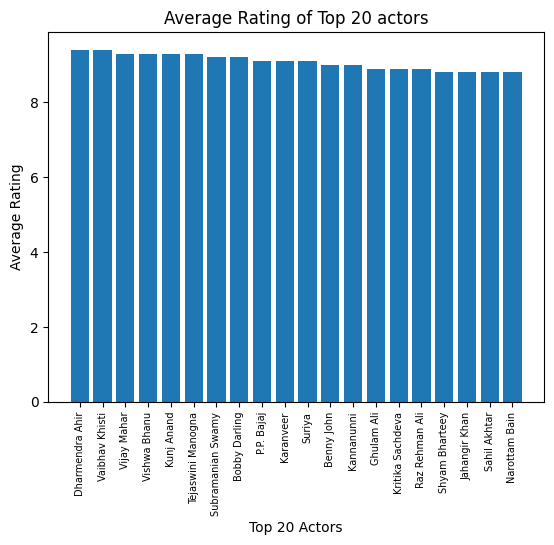

In [ ]:
# Top 20 highly rated actors
rated_actors = df[df['Rating'] >= 7]['Actor 1']
top_20_rated = df.groupby(rated_actors)['Rating'].mean().sort_values(ascending = False).head(20)
print(top_20_rated)

# Plot Bar
plt.bar(top_20_rated.index, top_20_rated.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation = 'vertical', fontsize = 7)
plt.show()

Directors with most movies

Kanti Shah                    13
Shyam Benegal                 12
Shantaram Rajaram Vankudre     9
Harmesh Malhotra               8
Kalpataru                      8
Basu Chatterjee                8
Mahesh Bhatt                   8
Shakti Samanta                 8
Hrishikesh Mukherjee           8
Shibu Mitra                    7
Name: Director, dtype: int64


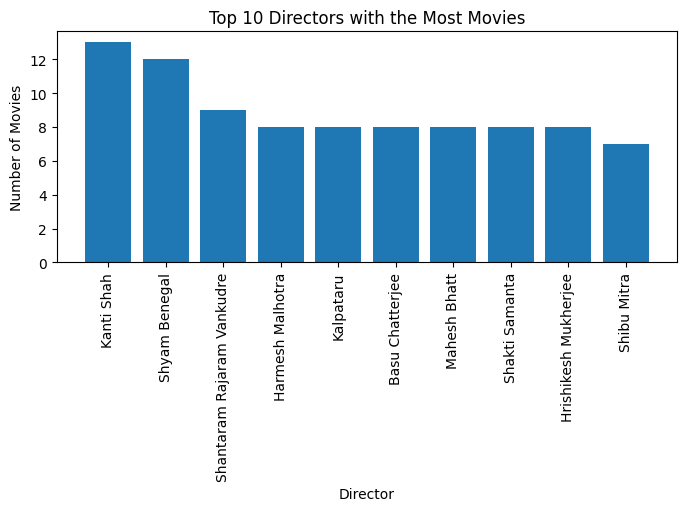

In [ ]:
# Directors with most movies
top_directors = df['Director'].value_counts().sort_values(ascending = False).head(10)
print(top_directors)

# Plot Bar
plt.figure(figsize= (8,3))
plt.bar(top_directors.index, top_directors.values)
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

Top 20 highly rated directors

Director
Suhrud Godbole                9.4
Arvind Pratap                 9.4
Nikhil Mahar                  9.3
Venkatesh Bk                  9.3
Vishwa Bhanu                  9.3
Rahul Mallick                 9.3
Utpal Kalal                   9.2
Tom Alter                     9.2
Jitin Rawat                   9.1
Sudha Kongara                 9.1
S. Sunil                      9.0
Meenal Dixit                  9.0
Susant Misra                  9.0
Sunil Patel                   8.9
Narendra Singh                8.9
Shyam Bharteey                8.8
Sanjay Puran Singh Chauhan    8.8
Abdul Sattar                  8.8
Ramkishan Choyal              8.8
Vishal Mourya                 8.8
Name: Rating, dtype: float64


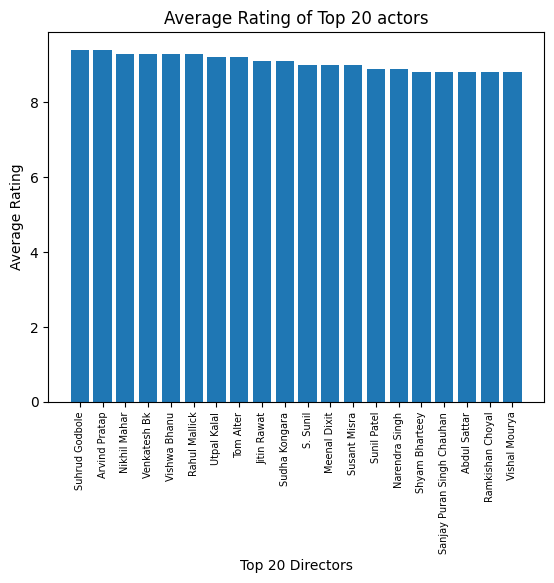

In [ ]:
# Top 20 highly rated directors
rated_directors = df[df['Rating'] >= 7]
top_20_directors = rated_directors.groupby(['Director'])['Rating'].mean().sort_values(ascending = False).head(20)
print(top_20_directors)

# Plot Bar
plt.bar(top_20_directors.index, top_20_directors.values)
plt.xlabel('Top 20 Directors')
plt.ylabel('Average Rating')
plt.title('Average Rating of Top 20 actors')
plt.xticks(rotation='vertical', fontsize= 7)
plt.show()

Correlation matrix & Heatmap

              Year  Duration    Rating     Votes
Year      1.000000 -0.391440 -0.073562  0.072956
Duration -0.391440  1.000000 -0.070444  0.084856
Rating   -0.073562 -0.070444  1.000000  0.108493
Votes     0.072956  0.084856  0.108493  1.000000


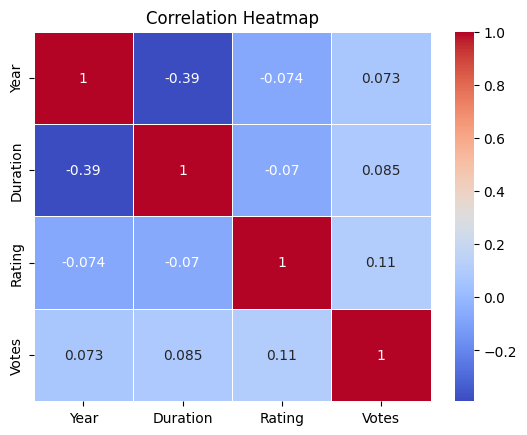

In [ ]:
# correlation_matrix
correlation_matrix= df.corr()        # df[['Year', 'Duration', 'Rating', 'Votes']].corr()
print(correlation_matrix)

# Correlation Heatmap
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True, linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.show()

Time series plot, how movie ratings has changed over the year

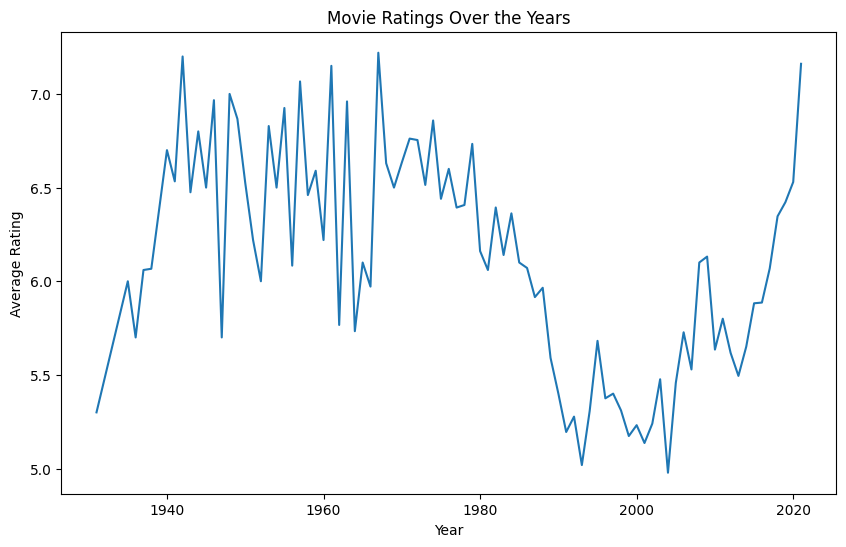

In [ ]:
# Group data by year and calculate the mean rating for each year
each_year_rating = df.groupby(['Year'])['Rating'].mean()

# Create a time series plot for movie ratings over the years
plt.figure(figsize=(10,6))
each_year_rating.plot(kind = 'line')
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

Time series plot to visualize no of movie release ovr the year

2017    102
2019     91
2018     90
2015     62
2016     58
       ... 
1945      1
1952      1
1931      1
1942      1
1944      1
Name: Year, Length: 87, dtype: int64


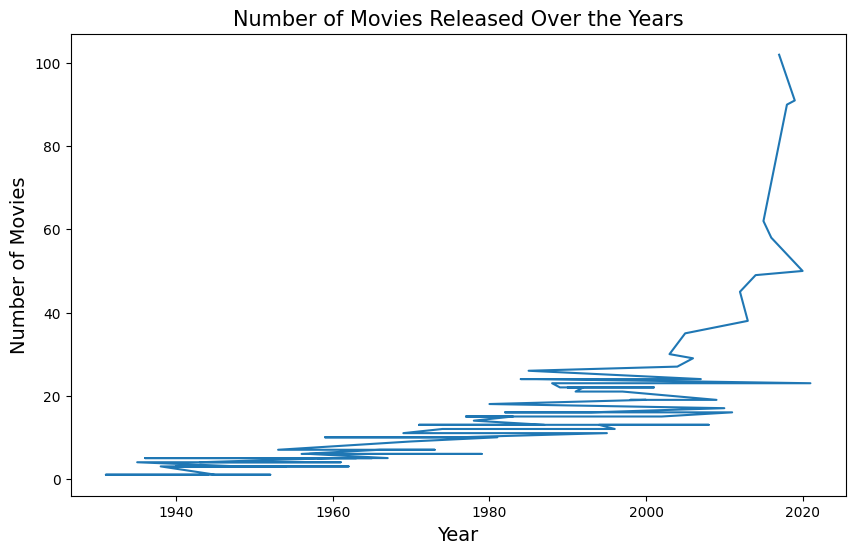

In [ ]:
# Group data by year and calculate the count of movies for each year
each_year_movies_num = df['Year'].value_counts()
print(each_year_movies_num)

plt.figure(figsize= (10,6))
plt.plot(each_year_movies_num)     # Plot(each_year_movies_num.index, each_year_movies_num.values)
plt.title('Number of Movies Released Over the Years', fontsize = 15)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.show()

Univariate Anaysis

In [82]:
# Distribution of Year

fig_year = px.histogram(df, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20),
                       title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density',
                       xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()

In [83]:
# Distribution of Duration

fig_duration = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20),
                           title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density',
                           xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

In [84]:
# Distribution of Rating

fig_rating = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20),
                         title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density',
                         xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [85]:
# Distribution of Votes

fig_votes = px.box(df, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20),
                        title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density',
                        xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()


Bivariate Analysis

In [86]:
# Average rating over year
year_avg_rating = df.groupby(['Year'])['Rating'].mean().reset_index()
top_10_rating_years = year_avg_rating.nlargest(10, 'Rating')
print(top_10_rating_years)

# Plot
fig = px.bar(top_10_rating_years, x='Year', y='Rating', title='Top 10 Years by Average Rating',
             color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

    Year    Rating
32  1967  7.220000
7   1942  7.200000
86  2021  7.160870
26  1961  7.150000
22  1957  7.066667
13  1948  7.000000
11  1946  6.966667
28  1963  6.960000
20  1955  6.925000
14  1949  6.866667


In [87]:
# Are there any trends in rating across year?
year_avg_rating = df.groupby(['Year'])['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(year_avg_rating, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20),
                  title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [88]:
# Are there any trends in votes across year?
year_avg_votes = df.groupby(['Year'])['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(year_avg_votes, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20),
                  title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [89]:
# Average Rating by Year for Genres
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genre = df['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
avg_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_3_genre)]

# Create the line plot with Plotly Express
fig = px.line(avg_rating_by_year, x= 'Year', y= 'Rating', color= 'Genre', color_discrete_sequence= ['#559C9E', '#0B1F26', '#00CC96'])
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year',
                  yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')
fig.show()

In [90]:
# Does length of movie have any impact on rating?

fig_duration_rating = px.scatter(df, x= 'Duration', y= 'Rating', trendline= 'ols', color= 'Rating', color_continuous_scale = "darkmint")
fig_duration_rating.update_layout(title='Does length of movie have any impact on rating?', title_x=0.5, title_pad=dict(t=20),
                              title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie',
                              xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_duration_rating.show()

In [ ]:
# Does length of movie have any impact on Votes?

fig_duration_votes = px.scatter(df, x= 'Duration', y= 'Votes', trendline= 'ols', color= 'Votes', color_continuous_scale = "darkmint")
fig_duration_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20),
                             title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie',
                             xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_duration_votes.show()

In [ ]:
# Does Ratings of movie have any impact on Votes?

fig_rating_votes = px.scatter(df, x= 'Rating', y='Votes', trendline= 'ols', color= 'Votes', color_continuous_scale = "darkmint")
fig_rating_votes.update_layout(title='Does Ratings of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20),
                               title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies',
                               xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rating_votes.show()

# **Predictive Analysis**

In [ ]:
# Import libraries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

### Data Preprocessing

In [ ]:
# Dropping non essential columns
df.drop('Name', axis= 1, inplace= True)

1. Feature Engineering

In [ ]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby(['Genre'])['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby(['Director'])['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby(['Actor 1'])['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby(['Actor 2'])['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby(['Actor 3'])['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating


2. Splitting into training and testing

In [ ]:
# Keeping the predictor and target variable

x = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [ ]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Model Building

In [ ]:
# Building 2 machine learning models and training them

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)   # Prediction for Y_test

# Random Forest
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)  # Prediction for Y_test

### Model Evaluation

In [ ]:
# Evaluating the performance of trained algorithms

print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, lr_pred))
print('R2 Score: ', r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, rf_pred))
print('R2 Score: ', r2_score(y_test, rf_pred))

The performance evaluation of Linear Regression is below:  

Mean squared error:  0.12941038133205235
Mean absolute error:  0.2606133106707823
R2 Score:  0.9417658040388698


The performance evaluation of Random Forest Regressor:  

Mean squared error:  0.1270413089700995
Mean absolute error:  0.20079069767441846
R2 Score:  0.9428318778943982


* The performance evaluation revealed that Random Forest performed well than the Linear Regression in terms of, r2_score which is 0.9428

### Model Testing

In [ ]:
x.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.422876,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.422876,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.422876,6.525,6.913333,6.866667,5.700
32,1993,15,168,6.422876,5.400,5.600000,6.400000,5.825


In [ ]:
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [ ]:
# Creating a new DataFrame with values close to 3rd row as per above sample data

data = {'Year': [2016], 'Votes': [58], 'Duration': [121],'Genre_mean_rating': [4.5], 'Director_encoded': [5.8],
        'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}

df_model_testing = pd.DataFrame(data)
df_model_testing

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2016,58,121,4.5,5.8,5.9,5.9,5.9


In [ ]:
# Predict the movie Rating
movie_rating_pred = rf.predict(df_model_testing)

# Display the movie Rating prediction
print(f'Predicted Movie Rating: {movie_rating_pred[0]}')

Predicted Movie Rating: 5.854999999999995


* We took the original data from X.head() and created a new dataframe almost similar to row 3. The original rating was 5.9. Out trained random forest regressor predicted 5.85 on unseen data. Therefore, showing the robustness of model.